# Page Stream Segmentation Experiment Analysis

In this notebook the results of the Standard PSS task are presented and the model outputs are analysed. In order to keep the notebook clean, the results of all the models have been calculated beforehand and saved in a dataframe. Instructions for re-running all these models can be found in ....

## Index
1. [Standard Results Analysis](#standard_PSS)
2. [Robust Results Analysis](#robust_PSS)
3. [Known-K Results Analysis](#known_k_PSS)
3. [Diagnostics Dataset Results Analysis](#diagnostics_PSS)

## Loading in the data
For this notebook we will use a MultiIndex dataframe with all the scores for all the models that has been pre-computed.

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Read in the large results table, containing the results for both the standard and robust tasks.
large_table = pd.read_csv('../resources/giant_results_table.csv.gz', header=[0, 1, 2], index_col=0)

In [14]:
large_table.head().round(2)

model                                                   BERT               \
experiment                                          Standard                
metric                                             Precision Recall    F1   
82493e06e956a0262e67e32167c32ff4_documenten_2           1.00   0.78  0.88   
86f33b5884e2922c05105a825dd1965a                        0.86   0.75  0.80   
8fa815c695a9811628e76705e839dcbc_deels-openbare...      1.00   0.96  0.98   
b1ab011d8ce964adfb85fd6d445e214b_documenten             0.97   0.91  0.94   
d8d9c5015c9ceb952052f29e1a27ed1f_openbaar-te-ma...      0.84   1.00  0.92   

model                                                                         \
experiment                                                                     
metric                                                SQ   SQ* Weighted PQ P   
82493e06e956a0262e67e32167c32ff4_documenten_2       0.99  0.99          0.88   
86f33b5884e2922c05105a825dd1965a                    0.84  0.84          0.72   
8fa815c695a9811628e76705e839dcbc_deels-openbare...  0.99  0.99          0.99   
b1ab011d8ce964adfb85fd6d445e214b_documenten         0.98  0.98          0.92   
d8d9c5015c9ceb952052f29e1a27ed1f_openbaar-te-ma...  0.99  0.99          0.77   

model                                                              \
experiment                                                          
metric                                             Weighted PQ* P   
82493e06e956a0262e67e32167c32ff4_documenten_2                0.88   
86f33b5884e2922c05105a825dd1965a                             0.72   
8fa815c695a9811628e76705e839dcbc_deels-openbare...           0.99   
b1ab011d8ce964adfb85fd6d445e214b_documenten                  0.92   
d8d9c5015c9ceb952052f29e1a27ed1f_openbaar-te-ma...           0.77   

model                                                             \
experiment                                                         
metric                                             Weighted PQ R   
82493e06e956a0262e67e32167c32ff4_documenten_2               0.69   
86f33b5884e2922c05105a825dd1965a                            0.63   
8fa815c695a9811628e76705e839dcbc_deels-openbare...          0.95   
b1ab011d8ce964adfb85fd6d445e214b_documenten                 0.86   
d8d9c5015c9ceb952052f29e1a27ed1f_openbaar-te-ma...          0.92   

model                                                              \
experiment                                                          
metric                                             Weighted PQ* R   
82493e06e956a0262e67e32167c32ff4_documenten_2                0.69   
86f33b5884e2922c05105a825dd1965a                             0.63   
8fa815c695a9811628e76705e839dcbc_deels-openbare...           0.95   
b1ab011d8ce964adfb85fd6d445e214b_documenten                  0.86   
d8d9c5015c9ceb952052f29e1a27ed1f_openbaar-te-ma...           0.92   

model                                                              ...  \
experiment                                                         ...   
metric                                             Weighted PQ F1  ...   
82493e06e956a0262e67e32167c32ff4_documenten_2                0.77  ...   
86f33b5884e2922c05105a825dd1965a                             0.68  ...   
8fa815c695a9811628e76705e839dcbc_deels-openbare...           0.97  ...   
b1ab011d8ce964adfb85fd6d445e214b_documenten                  0.89  ...   
d8d9c5015c9ceb952052f29e1a27ed1f_openbaar-te-ma...           0.84  ...   

model                                                  KNN-TEXT-K  \
experiment                                                 Robust   
metric                                             Weighted PQ* R   
82493e06e956a0262e67e32167c32ff4_documenten_2                0.62   
86f33b5884e2922c05105a825dd1965a                             0.89   
8fa815c695a9811628e76705e839dcbc_deels-openbare...           0.85   
b1ab011d8ce964adfb85fd6d445e214b_documenten                  0.80   
d8d9c5015c9ceb9

We also load in a dataframe that contains the information about all the streams from both datasets, such as the number of documents and number of pages in each stream.

In [15]:
# read in the metadata csv
metadata_df = pd.read_csv('../resources/metadata.csv', index_col=0)

To make the analysis clearer, we split the dataframe into two and use these

In [16]:
LONG = pd.read_csv('../resources/LONG.csv.gz', header=[0, 1, 2], index_col=0)
SHORT = pd.read_csv('../resources/SHORT.csv.gz', header=[0, 1, 2], index_col=0)

In this section, I will show the results of the aggregate scores of both the standard and robust tasks over all models and metrics, highlighting the best scores.

### Standard Experiment Results

Below whe show the results of the standard experiment for both LONG and SHORT, and highlight the best scores using a red color.

In [17]:
standard_results_LONG = LONG.loc[:, (slice(None), "Standard")].mean(axis=0).unstack()[['Precision', 'Recall', 'F1', 'SQ', 'Unweighted PQ F1', 'Weighted PQ F1']]
standard_results_LONG.style.format(precision=2).highlight_max(color = 'red',axis = 0)

,metric,Precision,Recall,F1,SQ,Unweighted PQ F1,Weighted PQ F1
model,experiment,,,,,,
BERT,Standard,0.84,0.88,0.83,0.91,0.79,0.77
TEXT-CNN,Standard,0.81,0.88,0.81,0.91,0.78,0.75
IMAGE-CNN,Standard,0.86,0.70,0.72,0.92,0.64,0.61
EFFICIENTNET,Standard,0.82,0.85,0.80,0.92,0.76,0.73
EARLY-FUSION,Standard,0.84,0.88,0.82,0.93,0.79,0.76
LATE-FUSION,Standard,0.87,0.80,0.79,0.93,0.74,0.71
EARLY-FUSION-EFFICIENTNET,Standard,0.82,0.86,0.81,0.92,0.77,0.74
LATE-FUSION-EFFICIENTNET,Standard,0.85,0.88,0.83,0.93,0.80,0.77
RUPTURE_IMAGE,Standard,0.33,1.00,0.47,0.91,0.18,0.18


In [18]:
standard_results_SHORT = SHORT.loc[:, (slice(None), "Standard")].mean(axis=0).unstack()[['Precision', 'Recall', 'F1', 'SQ', 'Unweighted PQ F1', 'Weighted PQ F1']]
standard_results_SHORT.style.format(precision=2).highlight_max(color = 'red',axis = 0)

,metric,Precision,Recall,F1,SQ,Unweighted PQ F1,Weighted PQ F1
model,experiment,,,,,,
BERT,Standard,0.81,0.73,0.72,0.86,0.66,0.62
TEXT-CNN,Standard,0.81,0.76,0.73,0.86,0.67,0.63
IMAGE-CNN,Standard,0.81,0.77,0.74,0.88,0.68,0.64
EFFICIENTNET,Standard,0.83,0.75,0.75,0.89,0.71,0.68
EARLY-FUSION,Standard,0.81,0.78,0.75,0.89,0.70,0.67
LATE-FUSION,Standard,0.86,0.77,0.76,0.87,0.70,0.66
EARLY-FUSION-EFFICIENTNET,Standard,0.83,0.76,0.75,0.88,0.70,0.66
LATE-FUSION-EFFICIENTNET,Standard,0.87,0.76,0.76,0.90,0.72,0.69
RUPTURE_IMAGE,Standard,0.57,0.50,0.46,0.66,0.37,0.30


## Robust Experiment Results

In [19]:
robust_results_LONG = LONG.loc[:, (slice(None), "Robust")].mean(axis=0).unstack()[['Precision', 'Recall', 'F1', 'SQ', 'Unweighted PQ F1', 'Weighted PQ F1']]
robust_results_LONG.style.format(precision=2).highlight_max(color = 'red',axis = 0)

,metric,Precision,Recall,F1,SQ,Unweighted PQ F1,Weighted PQ F1
model,experiment,,,,,,
BERT,Robust,0.79,0.58,0.60,0.77,0.50,0.47
TEXT-CNN,Robust,0.78,0.64,0.65,0.85,0.57,0.53
IMAGE-CNN,Robust,0.64,0.38,0.35,0.64,0.27,0.24
EFFICIENTNET,Robust,0.65,0.35,0.33,0.51,0.27,0.25
EARLY-FUSION,Robust,0.75,0.37,0.36,0.73,0.27,0.24
LATE-FUSION,Robust,0.84,0.60,0.62,0.81,0.54,0.51
EARLY-FUSION-EFFICIENTNET,Robust,0.76,0.41,0.41,0.74,0.31,0.28
LATE-FUSION-EFFICIENTNET,Robust,0.84,0.47,0.50,0.77,0.39,0.36
RUPTURE_IMAGE,Robust,0.33,1.00,0.47,0.91,0.18,0.18


In [20]:
# Haal deze tabel even uit elkaar, zo met die index wordt het niks
robust_results_SHORT = SHORT.loc[:, (slice(None), "Robust")].mean(axis=0).unstack()[['Precision', 'Recall', 'F1', 'SQ', 'Unweighted PQ F1', 'Weighted PQ F1']]
robust_results_SHORT.style.format(precision=2).highlight_max(color = 'red',axis = 0)

,metric,Precision,Recall,F1,SQ,Unweighted PQ F1,Weighted PQ F1
model,experiment,,,,,,
BERT,Robust,0.69,0.62,0.59,0.75,0.48,0.43
TEXT-CNN,Robust,0.70,0.68,0.62,0.78,0.54,0.49
IMAGE-CNN,Robust,0.77,0.51,0.55,0.71,0.44,0.37
EFFICIENTNET,Robust,0.61,0.64,0.55,0.78,0.46,0.41
EARLY-FUSION,Robust,0.68,0.71,0.64,0.80,0.56,0.52
LATE-FUSION,Robust,0.81,0.59,0.63,0.77,0.53,0.48
EARLY-FUSION-EFFICIENTNET,Robust,0.67,0.67,0.60,0.79,0.52,0.47
LATE-FUSION-EFFICIENTNET,Robust,0.70,0.66,0.62,0.82,0.53,0.48
RUPTURE_IMAGE,Robust,0.57,0.50,0.46,0.66,0.37,0.30


## Known-K Experiment Results

For the known-k experiment we select four models for the analysis, namely the CNN, BERT, rupture-text and rupture-image models.

In [21]:
standard_results_LONG.T.columns

MultiIndex([(                     'BERT', 'Standard'),
            (                 'TEXT-CNN', 'Standard'),
            (                'IMAGE-CNN', 'Standard'),
            (             'EFFICIENTNET', 'Standard'),
            (             'EARLY-FUSION', 'Standard'),
            (              'LATE-FUSION', 'Standard'),
            ('EARLY-FUSION-EFFICIENTNET', 'Standard'),
            ( 'LATE-FUSION-EFFICIENTNET', 'Standard'),
            (            'RUPTURE_IMAGE', 'Standard'),
            (             'RUPTURE_TEXT', 'Standard'),
            (               'LSTM_IMAGE', 'Standard'),
            (                'LSTM_TEXT', 'Standard'),
            (          'RUPTURE-IMAGE-K', 'Standard'),
            (           'RUPTURE-TEXT-K', 'Standard'),
            (                    'CNN-K', 'Standard'),
            (          'MEAN-DOC-LENGTH', 'Standard'),
            (                 'KNN-TEXT', 'Standard'),
            (                'KNN-IMAGE', 'Standard'),
          

In [22]:
def get_standard_and_known_k_results(score:str = 'Unweighted PQ R'):
    standard_results_LONG = LONG.loc[:, (slice(None), "Standard")].mean(axis=0).unstack()[['Precision', 'Recall', 'F1', 'SQ', 'Unweighted PQ P', 'Unweighted PQ R']]
    k_experiment_LONG = standard_results_LONG.T[['RUPTURE-IMAGE-K', 'RUPTURE_IMAGE', 'RUPTURE-TEXT-K', 'RUPTURE_TEXT', 'CNN-K', 'IMAGE-CNN', 'BERT-K', 'BERT', 'KNN-IMAGE-K', 'KNN-IMAGE', 'KNN-TEXT-K', 'KNN-TEXT']].round(2).T.droplevel(1)[score]

    standard_results_SHORT = SHORT.loc[:, (slice(None), "Standard")].mean(axis=0).unstack()[['Precision', 'Recall', 'F1', 'SQ', 'Unweighted PQ P', 'Unweighted PQ R']]
    k_experiment_SHORT = standard_results_SHORT.T[['RUPTURE-IMAGE-K', 'RUPTURE_IMAGE', 'RUPTURE-TEXT-K', 'RUPTURE_TEXT', 'CNN-K', 'IMAGE-CNN', 'BERT-K', 'BERT', 'KNN-IMAGE-K', 'KNN-IMAGE', 'KNN-TEXT-K', 'KNN-TEXT']].round(2).T.droplevel(1)[score]

    k_experiment_LONG_df = pd.DataFrame({'standard': [k_experiment_LONG.loc['RUPTURE_IMAGE'], k_experiment_LONG.loc['RUPTURE_TEXT'], k_experiment_LONG.loc['IMAGE-CNN'], k_experiment_LONG.loc['BERT'], k_experiment_LONG.loc['KNN-IMAGE'], k_experiment_LONG.loc['KNN-TEXT']],
                                  'known-k': [k_experiment_LONG.loc['RUPTURE-IMAGE-K'], k_experiment_LONG.loc['RUPTURE-TEXT-K'], k_experiment_LONG.loc['CNN-K'], k_experiment_LONG.loc['BERT-K'], k_experiment_LONG.loc['KNN-IMAGE-K'], k_experiment_LONG.loc['KNN-TEXT-K']]})
    k_experiment_SHORT_df = pd.DataFrame({'standard': [k_experiment_SHORT.loc['RUPTURE_IMAGE'], k_experiment_SHORT.loc['RUPTURE_TEXT'], k_experiment_SHORT.loc['IMAGE-CNN'], k_experiment_SHORT.loc['BERT'], k_experiment_SHORT.loc['KNN-IMAGE'], k_experiment_SHORT.loc['KNN-TEXT']],
                                  'known-k': [k_experiment_SHORT.loc['RUPTURE-IMAGE-K'], k_experiment_SHORT.loc['RUPTURE-TEXT-K'], k_experiment_SHORT.loc['CNN-K'], k_experiment_SHORT.loc['BERT-K'], k_experiment_SHORT.loc['KNN-IMAGE-K'], k_experiment_SHORT.loc['KNN-TEXT-K']]})
    
    diff_LONG =  k_experiment_LONG_df['known-k'] - k_experiment_LONG_df['standard']
    diff_SHORT =  k_experiment_SHORT_df['known-k'] - k_experiment_SHORT_df['standard']
    
    print(diff_LONG)
    print(diff_SHORT)
    

In [23]:
get_standard_and_known_k_results()

0   -0.04
1   -0.02
2    0.15
3    0.03
4    0.04
5   -0.03
dtype: float64
0    0.09
1    0.25
2    0.10
3    0.13
4    0.14
5    0.15
dtype: float64


In [24]:
k_experiment_LONG = standard_results_LONG.T[['RUPTURE-IMAGE-K', 'RUPTURE_IMAGE', 'RUPTURE-TEXT-K', 'RUPTURE_TEXT', 'CNN-K', 'IMAGE-CNN', 'BERT-K', 'BERT', 'KNN-IMAGE-K', 'KNN-IMAGE', 'KNN-TEXT-K', 'KNN-TEXT']].round(2).T.droplevel(1)['Weighted PQ F1']

In [25]:
k_experiment_LONG

model
RUPTURE-IMAGE-K    0.26
RUPTURE_IMAGE      0.18
RUPTURE-TEXT-K     0.28
RUPTURE_TEXT       0.18
CNN-K              0.72
IMAGE-CNN          0.61
BERT-K             0.81
BERT               0.77
KNN-IMAGE-K        0.54
KNN-IMAGE          0.50
KNN-TEXT-K         0.51
KNN-TEXT           0.51
Name: Weighted PQ F1, dtype: float64

In [26]:
k_experiment_SHORT = standard_results_SHORT.T[['RUPTURE-IMAGE-K', 'RUPTURE_IMAGE', 'RUPTURE-TEXT-K', 'RUPTURE_TEXT', 'CNN-K', 'IMAGE-CNN', 'BERT-K', 'BERT', 'KNN-IMAGE-K', 'KNN-IMAGE', 'KNN-TEXT-K', 'KNN-TEXT']].round(2).T.droplevel(1)['Weighted PQ F1']

In [27]:
k_experiment_LONG_df = pd.DataFrame({'standard': [k_experiment_LONG.loc['RUPTURE_IMAGE'], k_experiment_LONG.loc['RUPTURE_TEXT'], k_experiment_LONG.loc['IMAGE-CNN'], k_experiment_LONG.loc['BERT'], k_experiment_LONG.loc['KNN-IMAGE'], k_experiment_LONG.loc['KNN-TEXT']],
                                  'known-k': [k_experiment_LONG.loc['RUPTURE-IMAGE-K'], k_experiment_LONG.loc['RUPTURE-TEXT-K'], k_experiment_LONG.loc['CNN-K'], k_experiment_LONG.loc['BERT-K'], k_experiment_LONG.loc['KNN-IMAGE-K'], k_experiment_LONG.loc['KNN-TEXT-K']]})
k_experiment_SHORT_df = pd.DataFrame({'standard': [k_experiment_SHORT.loc['RUPTURE_IMAGE'], k_experiment_SHORT.loc['RUPTURE_TEXT'], k_experiment_SHORT.loc['IMAGE-CNN'], k_experiment_SHORT.loc['BERT'], k_experiment_SHORT.loc['KNN-IMAGE'], k_experiment_SHORT.loc['KNN-TEXT']],
                                  'known-k': [k_experiment_SHORT.loc['RUPTURE-IMAGE-K'], k_experiment_SHORT.loc['RUPTURE-TEXT-K'], k_experiment_SHORT.loc['CNN-K'], k_experiment_SHORT.loc['BERT-K'], k_experiment_SHORT.loc['KNN-IMAGE-K'], k_experiment_SHORT.loc['KNN-TEXT-K']]})

In [28]:
k_experiment_LONG_df

,standard,known-k
0,0.18,0.26
1,0.18,0.28
2,0.61,0.72
3,0.77,0.81
4,0.50,0.54
5,0.51,0.51


In [29]:
(k_experiment_LONG_df['known-k'] - k_experiment_LONG_df['standard']).mean()

0.06166666666666668

In [30]:
(k_experiment_SHORT_df['known-k'] - k_experiment_SHORT_df['standard']).mean()

0.11666666666666664

In [31]:
k_experiment_LONG_df.index = list(['CPD-IMAGE', 'CPD-TEXT', 'VGG16', 'BERT', 'KNN-IMAGE', 'KNN-TEXT'])
k_experiment_SHORT_df.index = list(['CPD-IMAGE', 'CPD-TEXT', 'VGG16', 'BERT', 'KNN-IMAGE','KNN-TEXT'])

In [32]:
k_experiment_LONG_df.index = ['(I) ', '(T) ', '(I) ', '(T) ', '(I) ', '(T) '] + k_experiment_LONG_df.index

In [33]:
k_experiment_SHORT_df.index = ['(I) ', '(T) ', '(I) ', '(T) ', '(I) ', '(T) '] + k_experiment_SHORT_df.index

In [34]:
k_experiment_SHORT_df

,standard,known-k
(I) CPD-IMAGE,0.30,0.41
(T) CPD-TEXT,0.22,0.44
(I) VGG16,0.64,0.75
(T) BERT,0.62,0.74
(I) KNN-IMAGE,0.55,0.62
(T) KNN-TEXT,0.50,0.57


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


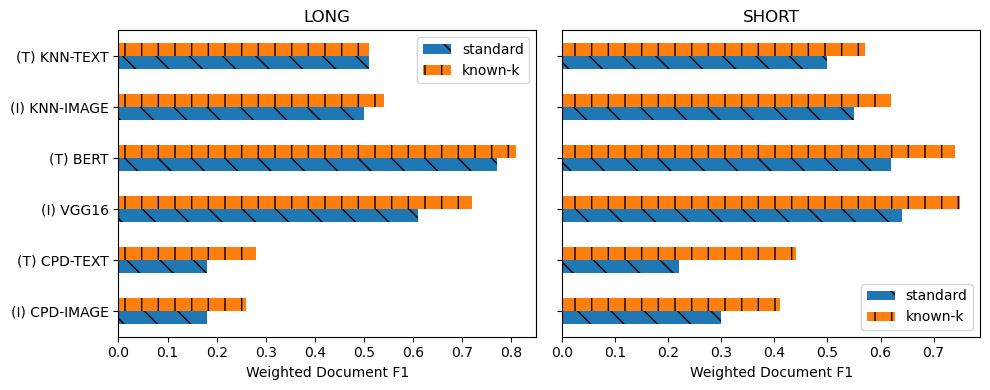

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)
plot1 = k_experiment_LONG_df.plot(kind='barh', ax=axes[0])
plot2 = k_experiment_SHORT_df.plot(kind='barh', ax=axes[1])
plt.tight_layout()

axes[0].set_title('LONG')
axes[1].set_title('SHORT')
ps = ['\\', '\\', '\\' ,'\\', '\\' ,'\\', '|', '|', '|', '|', '|', '|']

for i, p in enumerate(plot1.patches):
    p.set_hatch(ps[i])
        
for i, p in enumerate(plot2.patches):
    p.set_hatch(ps[i])
    
axes[0].set_xlabel('Weighted Document F1')
axes[1].set_xlabel('Weighted Document F1')
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.savefig('known-k_experiments.eps', bbox_inches='tight', format='eps')

plt.show()


## Diagnostics Dataset

In [36]:
little_variation_set = LONG[~LONG.index.str.contains('stream')]

In [37]:
# of course we have to select this from the test set, otherwise it would not make much sense
# this means we get seven streams for each variant

In [38]:
# Haal deze tabel even uit elkaar, zo met die index wordt het niks
standard_results = little_variation_set.loc[:, (slice(None), "Standard")].mean(axis=0).unstack()[['Precision', 'Recall', 'F1', 'SQ', 'Weighted PQ P', 'Weighted PQ R', 'Weighted PQ F1']]
standard_results.reindex(['BERT', 'TEXT-CNN', 'IMAGE-CNN', 'EFFICIENTNET', 'EARLY-FUSION', 'LATE-FUSION', 'EARLY-FUSION-EFFICIENTNET', 'LATE-FUSION-EFFICIENTNET'])
standard_results.style.format(precision=2).highlight_max(color = 'red',axis = 0)

,metric,Precision,Recall,F1,SQ,Weighted PQ P,Weighted PQ R,Weighted PQ F1
model,experiment,,,,,,,
BERT,Standard,0.95,0.88,0.91,0.96,0.89,0.82,0.85
TEXT-CNN,Standard,0.92,0.91,0.91,0.98,0.86,0.85,0.85
IMAGE-CNN,Standard,1.00,0.67,0.78,0.96,0.77,0.56,0.63
EFFICIENTNET,Standard,0.95,0.93,0.94,0.97,0.90,0.88,0.89
EARLY-FUSION,Standard,0.96,0.88,0.92,0.97,0.90,0.83,0.86
LATE-FUSION,Standard,0.98,0.76,0.84,0.97,0.84,0.68,0.74
EARLY-FUSION-EFFICIENTNET,Standard,0.95,0.92,0.93,0.98,0.90,0.88,0.89
LATE-FUSION-EFFICIENTNET,Standard,0.95,0.92,0.93,0.98,0.90,0.88,0.89
RUPTURE_IMAGE,Standard,0.45,1.00,0.60,1.00,0.24,0.47,0.31


In [44]:
long_streams_set = LONG.loc[longest_streams, :]
short_streams_set =  SHORT.loc[shortest_streams, :]

NameError: name 'longest_streams' is not defined

In [45]:
standard_results = long_streams_set.loc[:, (slice(None), "Standard")].mean(axis=0).unstack()[['Precision', 'Recall', 'F1', 'SQ', 'Weighted PQ P', 'Weighted PQ R', 'Weighted PQ F1']]
standard_results.reindex(['BERT', 'TEXT-CNN', 'IMAGE-CNN', 'EFFICIENTNET', 'EARLY-FUSION', 'LATE-FUSION', 'EARLY-FUSION-EFFICIENTNET', 'LATE-FUSION-EFFICIENTNET'])
standard_results.style.format(precision=2).highlight_max(color = 'red',axis = 0)

NameError: name 'long_streams_set' is not defined

In [ ]:
long_results = long_streams_set.loc[:, (slice(None), "Standard")].mean(axis=0).unstack()[['Precision', 'Recall', 'F1', 'SQ', 'Weighted PQ P', 'Weighted PQ R', 'Weighted PQ F1']]
long_results.reindex(['BERT', 'TEXT-CNN', 'IMAGE-CNN', 'EFFICIENTNET', 'EARLY-FUSION', 'LATE-FUSION', 'EARLY-FUSION-EFFICIENTNET', 'LATE-FUSION-EFFICIENTNET', 'LSTM_TEXT', 'LSTM_IMAGE', 'RUPTURE_IMGAE', 'RUPTURE_TEXT'])
long_results.style.format(precision=2).highlight_max(color = 'red',axis = 0)

In [ ]:
short_results = short_streams_set.loc[:, (slice(None), "Standard")].mean(axis=0).unstack()[['Precision', 'Recall', 'F1', 'SQ', 'Weighted PQ P', 'Weighted PQ R', 'Weighted PQ F1']]
short_results.reindex(['BERT', 'TEXT-CNN', 'IMAGE-CNN', 'EFFICIENTNET', 'EARLY-FUSION', 'LATE-FUSION', 'EARLY-FUSION-EFFICIENTNET', 'LATE-FUSION-EFFICIENTNET''LSTM_TEXT', 'LSTM_IMAGE', 'RUPTURE_IMGAE', 'RUPTURE_TEXT'])
short_results.style.format(precision=2).highlight_max(color = 'red',axis = 0)

In [ ]:
no_var_results = little_variation_set.loc[:, (slice(None), "Standard")].mean(axis=0).unstack()[['Precision', 'Recall', 'F1', 'SQ', 'Weighted PQ P', 'Weighted PQ R', 'Weighted PQ F1']]
no_var_results.reindex(['BERT', 'TEXT-CNN', 'IMAGE-CNN', 'EFFICIENTNET', 'EARLY-FUSION', 'LATE-FUSION', 'EARLY-FUSION-EFFICIENTNET', 'LATE-FUSION-EFFICIENTNET''LSTM_TEXT', 'LSTM_IMAGE', 'RUPTURE_IMGAE', 'RUPTURE_TEXT'])
no_var_results.style.format(precision=2).highlight_max(color = 'red',axis = 0)

The most interesting thing to show here is the performance of all models on the three dataset in a grouped barplot, where we group by model. This way we can specifically see if there are any models that are very bad at some things, and we don't create groups that are very large.

In [ ]:
from collections import defaultdict
diagnostic_df = defaultdict(dict)

In [ ]:
metric = "Weighted PQ F1"

In [ ]:
for model in no_var_results.index.get_level_values(0):
    short_score = short_results.loc[model][metric].values[0]
    long_score = long_results.loc[model][metric].values[0]
    no_var_score = no_var_results.loc[model][metric].values[0]
    
    diagnostic_df[model] = {'long': long_score, 'short': short_score, 'little variation': no_var_score}

In [ ]:
diagnostic_df = pd.DataFrame(diagnostic_df)
diagnostic_df.drop(['EARLY-FUSION-EFFICIENTNET', 'CNN-K', 'RUPTURE-TEXT-K', 'RUPTURE-IMAGE-K','RUPTURE_IMAGE', 'RUPTURE_TEXT', 'MEAN-DOC-LENGTH', 'EARLY-FUSION', 'LATE-FUSION', 'KNN-IMAGE', 'KNN-TEXT', 'XGBOOST-IMAGE', 'XGBOOST-TEXT', 'KNN-IMAGE-K', 'KNN-TEXT-K'], axis=1, inplace=True)
diagnostic_df.rename({'LATE-FUSION-EFFICIENTNET': 'BERT-EFF. LATE ENSEMBLE','LSTM_TEXT': 'LSTM-BERT', 'LSTM_IMAGE': 'LSTM-VGG16', 'IMAGE-CNN': 'VGG16'}, inplace=True, axis=1)

In [ ]:
diagnostic_df

In [ ]:
diagnostic_comp_df = large_table.loc[:, (slice(None), "Standard")].mean(axis=0).unstack()[['Precision', 'Recall', 'F1', 'SQ', 'Unweighted PQ F1', 'Weighted PQ F1']]

In [ ]:
diagnostic_comp_df.drop(['EARLY-FUSION-EFFICIENTNET', 'CNN-K', 'RUPTURE-TEXT-K', 'RUPTURE-IMAGE-K','RUPTURE_IMAGE', 'RUPTURE_TEXT', 'MEAN-DOC-LENGTH', 'EARLY-FUSION', 'LATE-FUSION', 'KNN-IMAGE', 'KNN-TEXT', 'XGBOOST-IMAGE', 'XGBOOST-TEXT'], axis=0, inplace=True)
diagnostic_comp_df.rename({'LATE-FUSION-EFFICIENTNET': 'BERT-EFF. LATE ENSEMBLE','LSTM_TEXT': 'LSTM-BERT', 'LSTM_IMAGE': 'LSTM-VGG16', 'IMAGE-CNN': 'VGG16'}, inplace=True, axis=0)

In [ ]:
diagnostic_df.columns

In [ ]:
diagnostic_comp_df = diagnostic_comp_df.loc[['BERT', 'TEXT-CNN', 'VGG16', 'EFFICIENTNET',
       'BERT-EFF. LATE ENSEMBLE', 'LSTM-VGG16', 'LSTM-BERT',
       'KNN-BOTH', 'XGBOOST-BOTH'], :]

In [ ]:
# Add the full dataset scores
translation_dict = {'MEAN-DOC-LENGTH': 'MEAN-DOC-LENGTH',
 'LSTM-BERT': '(T) LSTM-BERT',
 'LSTM-VGG16': '(I) LSTM-VGG16',
 'KNN-BOTH': '(T+I) KNN ENSEMBLE',
 'XGBOOST-BOTH': '(T+I) XGBOOST ENSEMBLE',
 'VGG16': '(I) VGG16',
 'BERT': '(T) BERT',
 'TEXT-CNN': '(T) TEXT-CNN',
 'BERT-EFF. EARLY ENSEMBLE': '(T+I) BERT-EFFICIENTNET EARLY',
 'EFFICIENTNET': '(I) EFFICIENTNET',
 'BERT-EFF. LATE ENSEMBLE': '(T+I) BERT-EFFICIENTNET LATE'}
diagnostic_df = diagnostic_df.T
plot1 = diagnostic_df.rename(translation_dict, axis=0).plot(kind='bar', figsize=(10, 7))
ps = ['\\', '\\', '\\' ,'\\','\\', '\\', '\\' ,'\\','\\', '\\',
      '*', '*', '*','*', '*', '*', '*', '*','*', '*',
     '/', '/', '/', '/', '/', '/', '/', '/', '/', '/',
     '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']

for i, p in enumerate(plot1.patches):
    p.set_hatch(ps[i])
plt.xticks(rotation=80)
plt.ylabel("W F1 score")
plt.legend()
plt.savefig("diagnostics_dataset.eps", bbox_inches='tight', format='eps')
plt.show()

## General Results Visualization

On dataset 2, we can actually see a very clear order in the performance of the models: Ensemble best, then image then text than the context models and than the fixed baselines. On Dataset 1 the models are a bit more varied, but still we see a clear improvement of neural binary classification models over the other methods, and text and the combinations working the best on LONG. This isd also a clear difference between the two datasets.

These plots are quite nice, but it probably makes more sense to combine them, so that we get average scores over both datasets, and make a plot like this, mabye even only using the best performing model for each type of approach.

In [ ]:
translation_dict = {'MEAN-DOC-LENGTH': 'MEAN-DOC-LENGTH',
 'LSTM-BERT': '(T) LSTM-BERT',
 'LSTM-VGG16': '(I) LSTM-VGG16',
 'KNN-BOTH': '(T+I) KNN ENSEMBLE',
 'XGBOOST-BOTH': '(T+I) XGBOOST ENSEMBLE',
 'VGG16': '(I) VGG16',
 'BERT': '(T) BERT',
 'TEXT-CNN': '(T) TEXT-CNN',
 'BERT-EFF. EARLY ENSEMBLE': '(T+I) BERT-EFFICIENTNET EARLY',
 'EFFICIENTNET': '(I) EFFICIENTNET',
 'BERT-EFF. LATE ENSEMBLE': '(T+I) BERT-EFFICIENTNET LATE'}

def drop_and_rename(input_df):
    input_df = input_df.drop(['VGG16-K', 'XGBOOST-IMAGE', 'RUPTURE_TEXT', 'RUPTURE_IMAGE', 'BERT-K',
                             'RUPTURE-IMAGE-K', 'RUPTURE-TEXT-K', 'XGBOOST-TEXT', 'KNN-TEXT', 'KNN-IMAGE', 'KNN-IMAGE-K', 'KNN-TEXT-K'], axis=0)
    input_df = input_df.rename({'LSTM_IMAGE': 'LSTM-VGG16', 'LSTM_TEXT':  'LSTM-BERT', 'LATE-ENSEMBLE': 'BERT-EFF. LATE ENSEMBLE',
                               'EARLY-ENSEMBLE': 'BERT-EFF. EARLY ENSEMBLE'}, axis=0)
    input_df = input_df.rename(translation_dict, axis=0)
    return input_df

In [ ]:
# translation_dict = {'MEAN-DOC-LENGTH': 'MEAN-DOC-LENGTH',
#  'LSTM-BERT': '(T) LSTM-BERT',
#  'LSTM-VGG16': '(I) LSTM-VGG16',
#  'KNN-BOTH': '(T+I) KNN ENSEMBLE',
#  'XGBOOST-BOTH': '(T+I) XGBOOST ENSEMBLE',
#  'VGG16': '(I) VGG16',
#  'BERT': '(T) BERT',
#  'TEXT-CNN': '(T) TEXT-CNN',
#  'BERT-EFF. EARLY ENSEMBLE': '(T+I) BERT-EFF. EARLY ENSEMBLE',
#  'EFFICIENTNET': '(I) EFFICIENTNET',
#  'BERT-EFF. LATE ENSEMBLE': '(T+I) BERT-EFF. LATE ENSEMBLE'}

# def drop_and_rename(input_df):
#     input_df = input_df.drop(['VGG16-K', 'XGBOOST-IMAGE', 'RUPTURE_TEXT', 'RUPTURE_IMAGE', 'BERT-K',
#                              'RUPTURE-IMAGE-K', 'RUPTURE-TEXT-K', 'XGBOOST-TEXT', 'KNN-TEXT', 'KNN-IMAGE', 'KNN-IMAGE-K', 'KNN-TEXT-K'], axis=0)
#     input_df = input_df.rename({'LSTM_IMAGE': 'LSTM-VGG16', 'LSTM_TEXT':  'LSTM-BERT', 'LATE-ENSEMBLE': 'BERT-EFFICIENTNET LATE',
#                                'EARLY-ENSEMBLE': 'BERT-EFFICIENTNET LATE'}, axis=0)
#     input_df = input_df.rename(translation_dict, axis=0)
#     return input_df

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display, Markdown

fix, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)
standard_df = drop_and_rename(standard_plot_df)
robust_df = drop_and_rename(robust_plot_df).loc[standard_df.index]
plot1 = standard_df[['SHORT', 'LONG']].plot(kind='barh', ax=axes[0])
plot2 = robust_df[['SHORT', 'LONG']].plot(kind='barh', ax=axes[1])
axes[0].set_title('Standard')
axes[1].set_title('Robust')

axes[0].set_xlabel('Weighted Document F1')
axes[1].set_xlabel('Weighted Document F1')

ps = ['\\', '\\', '\\' ,'\\','\\', '\\', '\\' ,'\\','\\', '\\', '\\',
      '|', '|', '|', '|','|', '|', '|', '|','|', '|', '|']

for i, p in enumerate(plot1.patches):
    p.set_hatch(ps[i])
        
for i, p in enumerate(plot2.patches):
    p.set_hatch(ps[i])
    

# Put the numbers of the overall performance next to the plot
for i, p in enumerate(axes[0].patches[int(len(axes[0].patches)/2):]):
    score = round(standard_df.iloc[i]['all'], 2)
    if i == 10:
        axes[0].annotate(score, (0.89, i), annotation_clip=False, weight='bold')
    else:
        axes[0].annotate(score, (0.89, i), annotation_clip=False)
        
for i, p in enumerate(axes[1].patches[int(len(axes[1].patches)/2):]):

    score = round(robust_df.iloc[i]['all'], 2)
    if i == 7:
        axes[1].annotate(score, (0.83, i), annotation_clip=False, weight='bold')
    else:
        axes[1].annotate(score, (0.83, i), annotation_clip=False)
        
axes[0].plot(standard_df['all'], range(len(standard_df['all'])), color='black', marker='o')
axes[1].plot(robust_df['all'], range(len(standard_df['all'])), color='black', marker='o')
axes[1].set_xlim(0, 0.8)
axes[0].legend()
axes[1].legend()

plt.savefig('standard_and_robust_results.eps', bbox_inches='tight', format='eps')
plt.show()

### Additional plots comparing results of models on datasets

We now remake the same plot above, but instead of splitting into two different plots we are simply going to combine both results and put this into one figure.

In [ ]:
# get the data of all the models and types
model_types = ["TEXT", "TEXT", "IMAGE", "IMAGE", "ENSEMBLE", "ENSEMBLE", "IMAGE", "TEXT", "CONTEXT", "CONTEXT", "IMAGE", "TEXT", "IMAGE", "FIXED",
              'TEXT', 'IMAGE', 'ENSEMBLE', 'TEXT', 'IMAGE', 'ENSEMBLE', 'TEXT']
combined_results = large_table.loc[:, (slice(None), "Standard")].mean(axis=0).unstack()[['Precision', 'Recall', 'F1', 'SQ', 'Unweighted PQ F1', 'Weighted PQ F1']]

combined_results.drop('EARLY-FUSION', inplace=True)
combined_results.drop('LATE-FUSION', inplace=True)

plot_score= 'Weighted PQ F1'

combined_results['type'] = model_types
combined_results.sort_values(plot_score, inplace=True, ascending=False)

combined_results = combined_results.reset_index()

In [ ]:
# pick: one ensemble method, one text, one image, and then one non-parametric and the mean document length basline

In [ ]:
combined_results

In [ ]:
standard_plot_data = combined_results.iloc[[1, 2, 4, 5, 6, 7, 8, 12, 17]].sort_values(plot_score, ascending=True)
rename_dict = {'LATE-FUSION-EFFICIENTNET': 'BERT-EFFICIENTNET LATE ENSEMBLE', 'LSTM_IMAGE': 'LSTM-VGG16', 'IMAGE-CNN': 'VGG16'}
standard_plot_data['model'] = standard_plot_data['model'].apply(lambda x: rename_dict.get(x, x))
standard_plot_data['model'].tolist()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

standard_plot_data = combined_results.iloc[[1, 2, 4, 5, 6, 7, 8, 12, 17]].sort_values(plot_score, ascending=True)
rename_dict = {'LATE-FUSION-EFFICIENTNET': 'BERT-EFFICIENTNET LATE ENSEMBLE', 'LSTM_IMAGE': 'LSTM-VGG16', 'IMAGE-CNN': 'VGG16'}
standard_plot_data['model'] = standard_plot_data['model'].apply(lambda x: rename_dict.get(x, x))
color_map = {'TEXT': 'lightblue', 'IMAGE': 'red', 'ENSEMBLE': 'green', 'FIXED': 'yellow', 'CONTEXT': 'purple'}
patterns = {'TEXT': '/', 'IMAGE': '\\', 'ENSEMBLE': 'o', 'FIXED': '+', 'CONTEXT': 'x'}
first_patterns = standard_plot_data['type']
first_bars = axes.barh(y="model", width='Weighted PQ F1', data=standard_plot_data, color=[color_map[item] for item in standard_plot_data['type']], edgecolor='black', alpha=0.5)

# set the hatch patterns for the bars
for bar, pattern in zip(first_bars, first_patterns):
    bar.set_hatch(patterns[pattern])

# manually set legend    
labels = list(color_map.keys())
handles = [plt.Rectangle((0,0),1,1, hatch=patterns[label], facecolor=color_map[label], alpha=0.5) for label in labels]
axes.legend(handles, labels, borderpad=1, prop={'size': 11})


axes.set_xlabel("Weighted Document F1")
# This looks ok, now make the same plot for the robust setting, see if we can boost the performance of the late ensemble
plt.tight_layout()
# Save these as two separate plots
#plt.savefig("../IJDAR_notebooks/standard_experiment_barplot_PQ_combined.png", bbox_inches='tight')
plt.show()

Ok this nice, but rewrite this to work with both standard and robust and to actually sort by the overall performance.

In [ ]:
# get performance on both datasets on F1, and then get color them based on model type
standard_results_all = pd.DataFrame(large_table.loc[:, (slice(None), "Standard")].mean(axis=0).unstack().droplevel(1))
standard_results_LONG = pd.DataFrame(LONG.loc[:, (slice(None), "Standard")].mean(axis=0).unstack().droplevel(1))
standard_results_SHORT = pd.DataFrame(SHORT.loc[:, (slice(None), "Standard")].mean(axis=0).unstack().droplevel(1))

In [ ]:
# get performance on both datasets on F1, and then get color them based on model type
robust_results_all = pd.DataFrame(large_table.loc[:, (slice(None), "Robust")].mean(axis=0).unstack().droplevel(1))
robust_results_LONG = pd.DataFrame(LONG.loc[:, (slice(None), "Robust")].mean(axis=0).unstack().droplevel(1))
robust_results_SHORT = pd.DataFrame(SHORT.loc[:, (slice(None), "Robust")].mean(axis=0).unstack().droplevel(1))

In [ ]:
standard_results_all.drop('EARLY-FUSION', inplace=True)
standard_results_all.drop('LATE-FUSION', inplace=True)

standard_results_LONG.drop('EARLY-FUSION', inplace=True)
standard_results_LONG.drop('LATE-FUSION', inplace=True)

standard_results_SHORT.drop('EARLY-FUSION', inplace=True)
standard_results_SHORT.drop('LATE-FUSION', inplace=True)

standard_results_all.rename({"CNN-K": "VGG16-K", "EARLY-FUSION-EFFICIENTNET": "EARLY-ENSEMBLE", "LATE-FUSION-EFFICIENTNET": "LATE-ENSEMBLE", 'IMAGE-CNN': 'VGG16'}, inplace=True)
standard_results_LONG.rename({"CNN-K": "VGG16-K", "EARLY-FUSION-EFFICIENTNET": "EARLY-ENSEMBLE", "LATE-FUSION-EFFICIENTNET": "LATE-ENSEMBLE", 'IMAGE-CNN': 'VGG16'}, inplace=True)
standard_results_SHORT.rename({"CNN-K": "VGG16-K", "EARLY-FUSION-EFFICIENTNET": "EARLY-ENSEMBLE", "LATE-FUSION-EFFICIENTNET": "LATE-ENSEMBLE", 'IMAGE-CNN': 'VGG16'}, inplace=True)

In [ ]:
robust_results_all.drop('EARLY-FUSION', inplace=True)
robust_results_all.drop('LATE-FUSION', inplace=True)

robust_results_LONG.drop('EARLY-FUSION', inplace=True)
robust_results_LONG.drop('LATE-FUSION', inplace=True)

robust_results_SHORT.drop('EARLY-FUSION', inplace=True)
robust_results_SHORT.drop('LATE-FUSION', inplace=True)

robust_results_all.rename({"CNN-K": "VGG16-K", "EARLY-FUSION-EFFICIENTNET": "EARLY-ENSEMBLE", "LATE-FUSION-EFFICIENTNET": "LATE-ENSEMBLE", 'IMAGE-CNN': 'VGG16'}, inplace=True)
robust_results_LONG.rename({"CNN-K": "VGG16-K", "EARLY-FUSION-EFFICIENTNET": "EARLY-ENSEMBLE", "LATE-FUSION-EFFICIENTNET": "LATE-ENSEMBLE", 'IMAGE-CNN': 'VGG16'}, inplace=True)
robust_results_SHORT.rename({"CNN-K": "VGG16-K", "EARLY-FUSION-EFFICIENTNET": "EARLY-ENSEMBLE", "LATE-FUSION-EFFICIENTNET": "LATE-ENSEMBLE", 'IMAGE-CNN': 'VGG16'}, inplace=True)

In [ ]:
standard_plot_df = pd.DataFrame({'LONG': standard_results_LONG['Weighted PQ F1'], 'SHORT': standard_results_SHORT['Weighted PQ F1'],
                          'all': standard_results_all['Weighted PQ F1']}).sort_values('all', ascending=True)

robust_plot_df = pd.DataFrame({'LONG': robust_results_LONG['Weighted PQ F1'], 'SHORT': robust_results_SHORT['Weighted PQ F1'],
                          'all': robust_results_all['Weighted PQ F1']}).sort_values('all', ascending=True)

In [ ]:
drop_and_rename(standard_plot_df)[['SHORT', 'LONG']]

In [ ]:
standard_df = drop_and_rename(standard_plot_df).sort_index()
robust_df = drop_and_rename(robust_plot_df).sort_index()
diff = 100*((standard_df-robust_df)/standard_df)
diff = diff.drop(['MEAN-DOC-LENGTH', '(T) LSTM-BERT', '(I) LSTM-VGG16'], axis=0).sort_values('all', ascending=False)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
diff[['SHORT', 'LONG']].plot(kind='barh', ax=ax, style=['-', '+'])
for i, p in enumerate(ax.patches[int(len(ax.patches)/2):]):
        ax.annotate(int(diff['all'].tolist()[i]), (103.0, (p.get_y() * 1.005)-0.25), annotation_clip=False)
        p.set_hatch('|')
        ax.patches[i].set_hatch('\\')

ax.plot(diff['all'], range(len(diff['all'])), color='black', marker='o')
ax.set_xlabel('Weighted Document F1 performance drop')
ax.set_xlim([0, 100])
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig('relative_performance_drops_robust.eps', format='eps')
plt.show()

In [ ]:
colors = ['green' if item > 0 else 'red' for item in model_diff_df['PQ F1 Difference']]
plt.barh(y='model', width='PQ F1 Difference', data=model_diff_df.reset_index(), color=[color for color in colors])
plt.xticks(rotation=80)
plt.xlabel("PQ F1 score difference")
plt.tight_layout()
plt.savefig('LONG_SHORT_differences.png', bbox_inches='tight')
plt.show()

In [ ]:
# Now we update our plot with the new names
model_diff_df.drop(['EARLY-FUSION-EFFICIENTNET', 'CNN-K', 'RUPTURE-TEXT-K', 'RUPTURE-IMAGE-K','RUPTURE_IMAGE', 'RUPTURE_TEXT', 'MEAN-DOC-LENGTH', 'EARLY-FUSION', 'LATE-FUSION', 'KNN-IMAGE', 'KNN-TEXT', 'XGBOOST-IMAGE', 'XGBOOST-TEXT'], axis=0, inplace=True)
model_diff_df.rename({'LATE-FUSION-EFFICIENTNET': 'BERT-EFF. LATE ENSEMBLE','LSTM_TEXT': 'LSTM-BERT', 'LSTM_IMAGE': 'LSTM-VGG16', 'IMAGE-CNN': 'VGG16'}, inplace=True, axis=0)
model_diff_df = model_diff_df.sort_values('PQ F1 Difference')

In [ ]:
model_diff_df = pd.DataFrame({'model': standard_results_LONG.sort_values('model')['model'], 'PQ F1 Difference': model_diff}).round(2).set_index('model')

In [ ]:
standard_results_SHORT.set_index('model').loc['XGBOOST-BOTH'].round(2)

In [ ]:
plot_score = 'Weighted PQ F1'
model_diff = standard_results_SHORT[['model', plot_score]].sort_values('model')[plot_score] - standard_results_LONG[['model', plot_score]].sort_values('model')[plot_score]

In [ ]:
model = 'KNN-BOTH'
a = robust_results_LONG.set_index('model').loc[model].round(2).loc[['Precision', 'Recall', 'F1', 'SQ', 'Unweighted PQ F1', 'Weighted PQ F1']]
b = robust_results_SHORT.set_index('model').loc[model].round(2).loc[['Precision', 'Recall', 'F1', 'SQ', 'Unweighted PQ F1', 'Weighted PQ F1']]
print(pd.DataFrame(pd.concat([a, b])).T.to_latex())

In [ ]:
robust_results_LONG.reset_index(inplace=True)
robust_results_SHORT.reset_index(inplace=True)

In [ ]:
# get performance on both datasets on F1, and then get color them based on model type
robust_results_LONG = pd.DataFrame(LONG.loc[:, (slice(None), "Robust")].mean(axis=0).unstack().droplevel(1))
robust_results_SHORT = pd.DataFrame(SHORT.loc[:, (slice(None), "Robust")].mean(axis=0).unstack().droplevel(1))

## Similarity between pages

In [ ]:
robust_results_LONG

In [ ]:
robust_results_LONG.drop('EARLY-FUSION', inplace=True)
robust_results_LONG.drop('LATE-FUSION', inplace=True)

robust_results_SHORT.drop('EARLY-FUSION', inplace=True)
robust_results_SHORT.drop('LATE-FUSION', inplace=True)

robust_results_LONG.rename({"EARLY-FUSION-EFFICIENTNET": "EARLY-ENSEMBLE", "LATE-FUSION-EFFICIENTNET": "LATE-ENSEMBLE"}, inplace=True)
robust_results_SHORT.rename({"EARLY-FUSION-EFFICIENTNET": "EARLY-ENSEMBLE", "LATE-FUSION-EFFICIENTNET": "LATE-ENSEMBLE"}, inplace=True)

robust_results_LONG.reset_index(inplace=True)
robust_results_SHORT.reset_index(inplace=True)


In [ ]:
# get performance on both datasets on F1, and then get color them based on model type
robust_results_LONG = pd.DataFrame(LONG.loc[:, (slice(None), "Robust")].mean(axis=0).unstack().droplevel(1))
robust_results_SHORT = pd.DataFrame(SHORT.loc[:, (slice(None), "Robust")].mean(axis=0).unstack().droplevel(1))